MEM T380

Case Studies Group 10

Ante Sokosa
Ziad Hatab

HW3 - Regression Prediction of Bead Geometry for GMAW-based Rapid Manufacturing

In [1]:
# for calculating notebook runtime
import time
start_time = time.time()

# 1 &nbsp; `Data Exploration`

In [2]:
import pandas as pd

df_train_raw = pd.read_excel('bead_geometry.xlsx', sheet_name='training_data')
df_test_raw = pd.read_excel('bead_geometry.xlsx', sheet_name='testing_data')
df_all_raw = pd.concat([df_train_raw, df_test_raw], ignore_index=True)
df_all_raw.head()

,F,S,V,D,W,H
0,3.6,22.5,17.5,9,8.95,2.88
1,5.2,22.5,17.5,9,10.72,3.35
2,3.6,37.5,17.5,9,7.19,2.45
3,5.2,37.5,17.5,9,8.29,2.75
4,3.6,22.5,20.5,9,10.25,2.66


The column names in our dataset are not clear at first but can be quickly understood, thus we will keep the names as they are.  
For reference we will list the column names and their meaning as established by the research paper, below:

independent variables / predictors / regressors:
- **F** = **Feed** Rate (m/mm)
- **S** = Welding **Speed** (cm/min) 
- **V** = Arc **Voltage** (V)
- **D** = Nozzle-to-Plate **Distance** (mm)
 
dependent variables / response:
- **W** = **Width** of Bead (mm)
- **H** = **Height** of Bead (mm)

In [3]:
independnt_vars = ['F','S','V','D']
dependant_vars = ['W','H']

In [4]:
df_all_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       43 non-null     float64
 1   S       43 non-null     float64
 2   V       43 non-null     float64
 3   D       43 non-null     int64  
 4   W       43 non-null     float64
 5   H       43 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.1 KB


The dataframe does not have any missing values.  
However, `Distance` is an int and not a float, thus it may have non continuous values. Lets investigate this further.

In [5]:
df_all_raw['D'].value_counts()

12    25
9      8
15     8
6      1
18     1
Name: D, dtype: int64

We were correct to assume that `Distance` has not many continuous values. It has only 3 main unique values with an additional 2 unique values but they are only 1 each.

In [6]:
df_all_raw['F'].value_counts()

4.4    14
5.2    12
3.6     8
4.0     5
6.0     3
2.8     1
Name: F, dtype: int64

However, other feature columns also have few unique values as seen with `Feed` above. Thus, we will leave `Distance` as is, even making it a float column as in the research paper. It does not need to be made categorical.

In [7]:
df_train_raw['D'] = df_train_raw['D'].astype(float)
df_test_raw['D'] = df_test_raw['D'].astype(float)
df_all_raw['D'] = df_all_raw['D'].astype(float)
df_all_raw.head()

,F,S,V,D,W,H
0,3.6,22.5,17.5,9.0,8.95,2.88
1,5.2,22.5,17.5,9.0,10.72,3.35
2,3.6,37.5,17.5,9.0,7.19,2.45
3,5.2,37.5,17.5,9.0,8.29,2.75
4,3.6,22.5,20.5,9.0,10.25,2.66


In [8]:
df_all_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       43 non-null     float64
 1   S       43 non-null     float64
 2   V       43 non-null     float64
 3   D       43 non-null     float64
 4   W       43 non-null     float64
 5   H       43 non-null     float64
dtypes: float64(6)
memory usage: 2.1 KB


In [9]:
df_all_raw.describe()

,F,S,V,D,W,H
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,4.502326,30.279070,18.793023,12.000000,8.997326,2.865419
std,0.746257,6.540444,1.365980,2.267787,1.226242,0.358247
min,2.800000,15.000000,16.000000,6.000000,6.830000,2.170000
25%,4.000000,24.750000,17.500000,12.000000,8.030000,2.681000
50%,4.400000,30.000000,19.000000,12.000000,8.920000,2.811000
75%,5.200000,37.500000,19.650000,12.000000,9.874500,3.023500
max,6.000000,45.000000,22.000000,18.000000,11.760000,3.800000


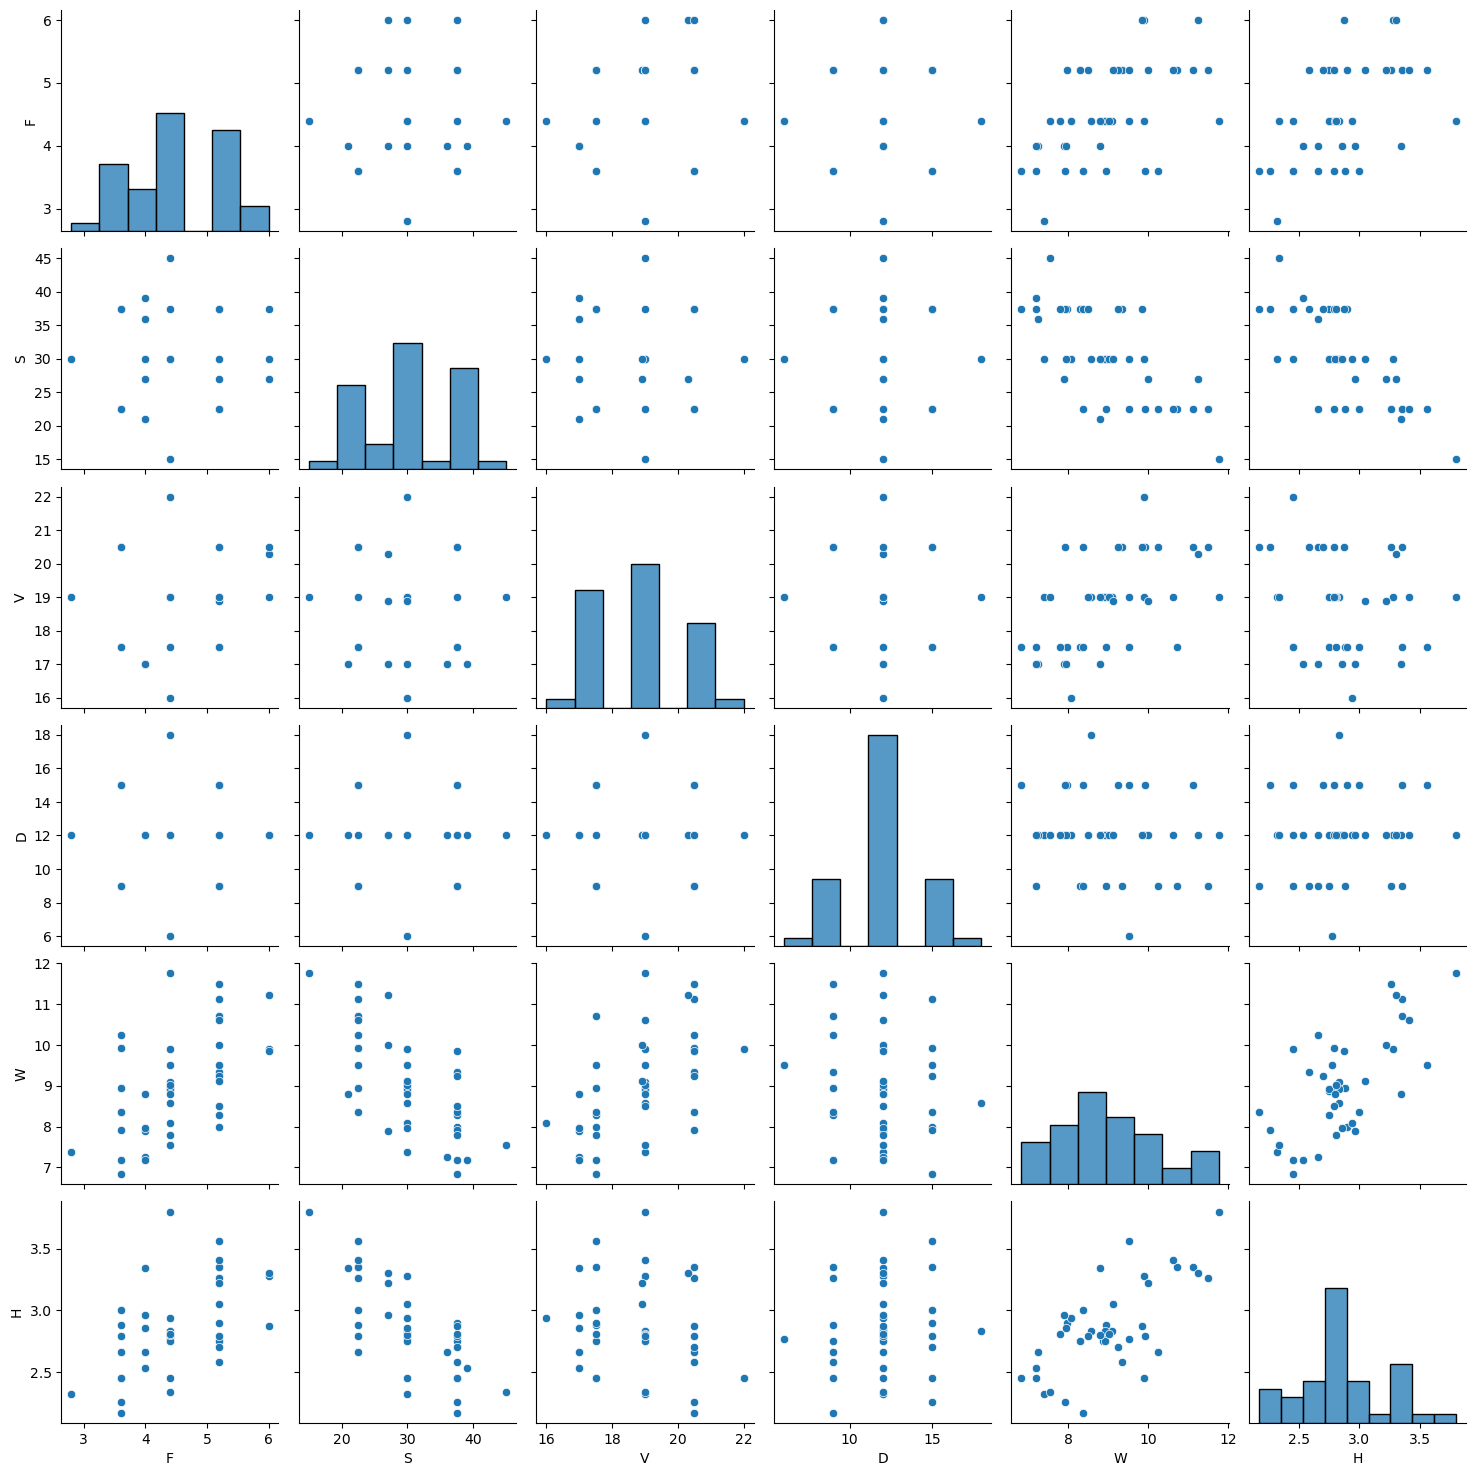

In [10]:
import seaborn as sns

sns.pairplot(df_all_raw)

We are able to see a clear linear trend between `Width` and `Height` of the bead.  
From independent variables to other independent variables we do not see any clear trends.  
However, this makes sense as they are independent variables.  
We do see slight trends between independent variables and dependent variables. 
 
For example, `Width` and `Height` seem to generally increase with `Feed` and decrease with `Speed`. However, as `Voltage` increases, `Width` increases while `Height` dereases. The same happends with `Distance` but to a lesser extent, even being a stretch to call it a trend. However, perhaps a combination of all of these independent variables will show a clearer trend.

Lets check visual inferences from the scatter plot of the data with a correlation matrix.

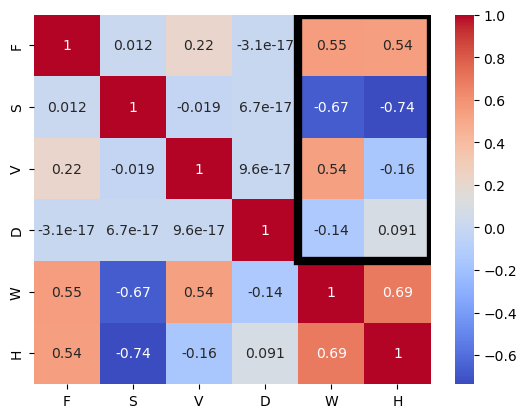

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

corr_raw = df_all_raw.corr()
ax = sns.heatmap(corr_raw, annot=True, cmap='coolwarm')

rectangle = Rectangle((4, 0), 2, 4, fill=False, edgecolor='black', lw=6)
ax.add_patch(rectangle)
plt.draw()

plt.show()

Our visual inferences were mostly correct. There is little to no correlation between independent variables. We were correct in our inferences of `Feed`, `Speed`, and `Voltage` with `Width` and `Height`. However, we were incorrect in `Distance` vs `Width` and `Height`. It is slightly opposite of what we visually inferred. The main cells of the heatmap we are intereted in are boxed in black on the correlation matrix heatmap above. 

Additionally, standardization may be able to help. (We will use standardization, not normalization due to the one off unique type values we found in some columns suh as `Distance` and `Feed` earlier. We don't want them to squeeze any features into a small range.)

In [12]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_all_raw_std = std_scaler.fit_transform(df_all_raw)
df_all_raw_std = pd.DataFrame(df_all_raw_std, columns=df_all_raw.columns)
df_all_raw_std.describe()

,F,S,V,D,W,H
count,4.300000e+01,4.300000e+01,4.300000e+01,43.000000,4.300000e+01,4.300000e+01
mean,4.853998e-16,-6.196594e-17,4.182701e-16,0.000000,-7.126083e-16,8.200804e-16
std,1.011835e+00,1.011835e+00,1.011835e+00,1.011835,1.011835e+00,1.011835e+00
min,-2.308149e+00,-2.363738e+00,-2.068901e+00,-2.677063,-1.788371e+00,-1.964142e+00
25%,-6.810932e-01,-8.553708e-01,-9.577925e-01,0.000000,-7.981898e-01,-5.208723e-01
50%,-1.387412e-01,-4.317329e-02,1.533157e-01,0.000000,-6.380529e-02,-1.537000e-01
75%,9.459628e-01,1.117109e+00,6.347959e-01,0.000000,7.238014e-01,4.464854e-01
max,2.030667e+00,2.277391e+00,2.375532e+00,2.677063,2.279624e+00,2.639634e+00


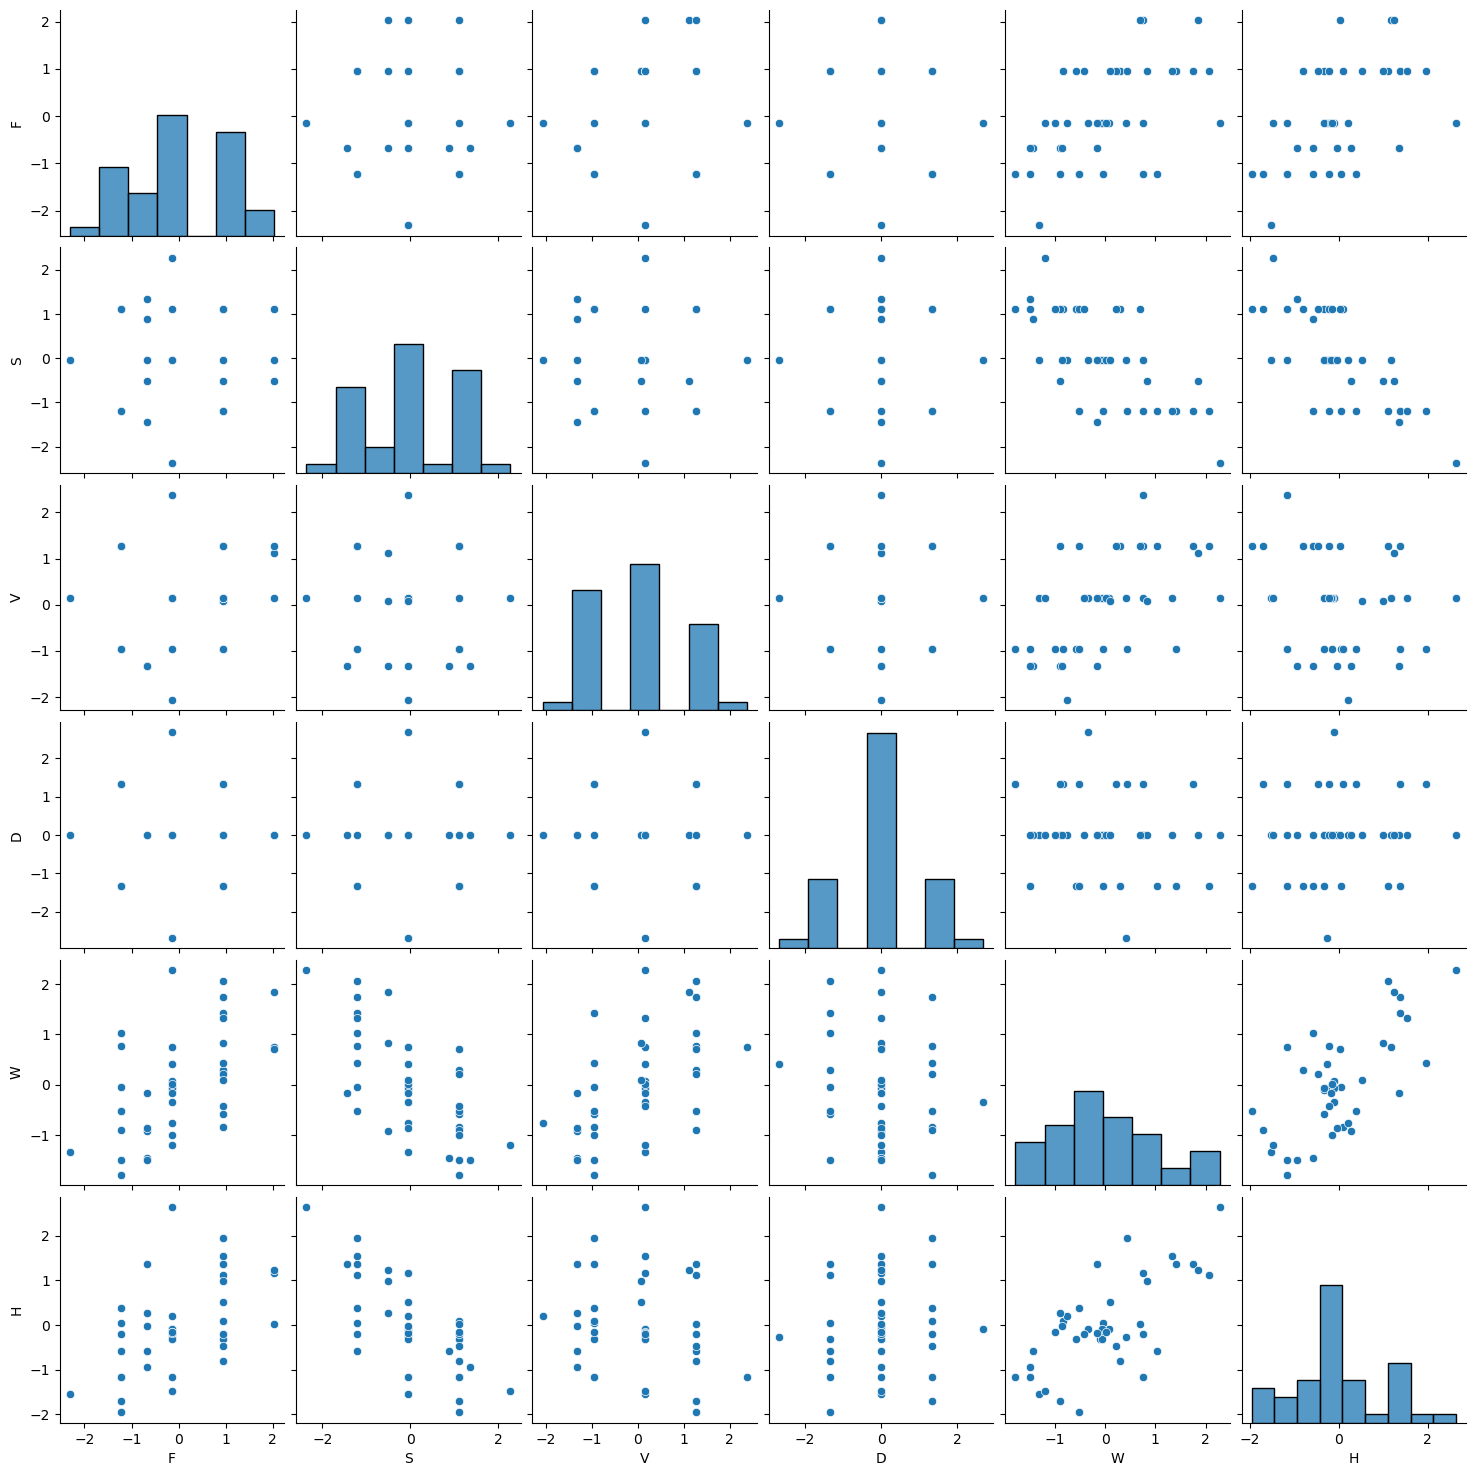

In [13]:
sns.pairplot(df_all_raw_std)

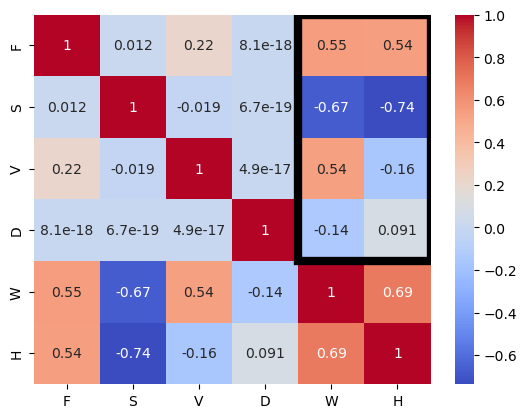

In [14]:
corr_raw_std = df_all_raw_std.corr()
ax_std = sns.heatmap(corr_raw_std, annot=True, cmap='coolwarm')

rectangle = Rectangle((4, 0), 2, 4, fill=False, edgecolor='black', lw=6)
ax_std.add_patch(rectangle)
plt.draw()

plt.show()

Standardization didn't make much of a difference for us to see any trends clearer. However, we will stick with this as the data for our regrssion analysis.

In [17]:
df_train_raw_std = std_scaler.fit_transform(df_train_raw)
df_train_raw_std = pd.DataFrame(df_train_raw_std, columns=df_train_raw.columns)
df_test_raw_std = std_scaler.fit_transform(df_test_raw)
df_test_raw_std = pd.DataFrame(df_test_raw_std, columns=df_test_raw.columns)

df_train = df_train_raw_std.copy()
df_test = df_test_raw_std.copy()
df_all = df_all_raw_std.copy()

df_all.head()

,F,S,V,D,W,H
0,-1.223445,-1.203455,-0.957793,-1.338532,-0.039051,0.041184
1,0.945963,-1.203455,-0.957793,-1.338532,1.421467,1.368653
2,-1.223445,1.117109,-0.957793,-1.338532,-1.491317,-1.173309
3,0.945963,1.117109,-0.957793,-1.338532,-0.583650,-0.325989
4,-1.223445,-1.203455,1.264424,-1.338532,1.033646,-0.580185


In conclusion of our data exploration, `Feed`, `Speed`, and `Voltage` seem to be the most important features for predicting `Width` and `Height` of the bead, with `Speed` being the strongest. (`Voltage` has a much lower impact on `Height` than `Width` though.) `Distance` is not as important but still has some effect on the bead geometry. (More so for `Width` than `Height`.)

# 2 &nbsp; `Regression with Ordinary Least-Squares (OLS)`



## 2.1 &nbsp; `Simple Linear Regression`



## 2.2 &nbsp; `Multivariable Polynomial Regression`



## 2.3 &nbsp; `Predicting with Multivariable Polynomial Regression`



# 3 &nbsp; `Regression with Decision Trees (RDT)`



In [16]:
end_time = time.time()
print(f'Total runtime of this notebook is {(end_time-start_time)/60:0.2f} minutes.')

Total runtime of this notebook is 0.78 minutes.
